# Coordinate transformations

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import coordinates as coord

In [3]:
from geodetic_elipsoids import WGS84

## Create a grid of points in the Geocentric Geodetic System (GGS)

In [4]:
# limits west, east, south and north
area = [-35, -25, -5, 5]

In [5]:
# semimajor axis and flattenig
a, f = WGS84()

In [6]:
# semiminor axis
b = a*(1-f)

In [7]:
print (a, b)

6378137.0 6356752.314245179


In [8]:
# number of points along latitude and longitude
N_lat = 300
N_lon = 300

longitude_min = area[0]
longitude_max = area[1]

latitude_min = area[2]
latitude_max = area[3]

#longitude_min = 0
#longitude_max = 30

#latitude_min = -60
#latitude_max = -30

In [9]:
longitude = np.linspace(longitude_min, longitude_max, N_lon)
latitude = np.linspace(latitude_min, latitude_max, N_lat)

In [10]:
longitude, latitude = np.meshgrid(longitude, latitude)

In [11]:
longitude = np.ravel(longitude)
latitude = np.ravel(latitude)

In [12]:
height = np.zeros_like(latitude) + 4000

## Convert Geocentric Geodetic Coordinates to Topocentric Cartesian Coordinates

Let's first define the origin of our Topocentric Cartesian System (TCS) at the point `P`

In [13]:
# Coordinates of P in the GGS
longitude_P = 0.5*(longitude_max + longitude_min)
latitude_P = 0.5*(latitude_max + latitude_min)
height_P = 0

In [14]:
X, Y, Z = coord.GGC2GCC(height, latitude, longitude, a, b)

In [15]:
X_P, Y_P, Z_P = coord.GGC2GCC(height_P, latitude_P, longitude_P, a, b)

In [16]:
x, y, z = coord.GCC2TCC(X, Y, Z, X_P, Y_P, Z_P, latitude_P, longitude_P)

In [17]:
y_min = np.min(y)
y_max = np.max(y)
x_min = np.min(x)
x_max = np.max(x)

In [18]:
z_min = np.min(z)
z_max = np.max(z)

In [19]:
print(z_min, z_max)

-3999.4581697013286 44318.558122605406


## Plot the `z` coordinate as a function of coordinates `x` and `y`

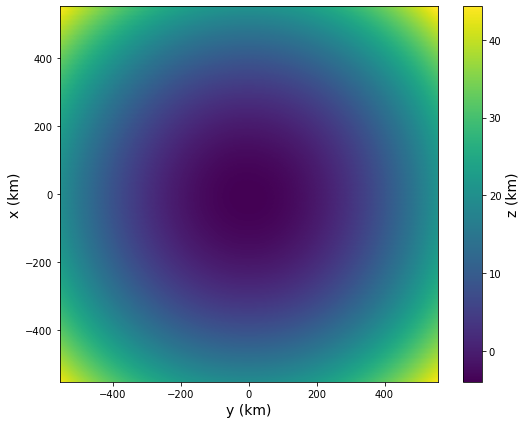

In [20]:
figure_size = 6
plt.figure(figsize=(1.3*figure_size, figure_size))
plt.axis('scaled')
plt.scatter(0.001*y, 0.001*x, c = 0.001*z, cmap = plt.get_cmap('viridis'))
cb = plt.colorbar()
cb.set_label('z (km)', fontsize = 14)
plt.xlim(0.001*y_min, 0.001*y_max)
plt.ylim(0.001*x_min, 0.001*x_max)
plt.ylabel('x (km)', fontsize = 14)
plt.xlabel('y (km)', fontsize = 14)
plt.tight_layout()
plt.show()